In [245]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [247]:
df_cust= pd.read_csv('customers.csv')

In [249]:
df_trans= pd.read_csv('transactions.csv')

In [251]:
df_cust.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,358211.0,Married
1,2,Anjali Pandey,Female,47,City,Consultant,65172.0,Single
2,3,Aaryan Chauhan,Male,21,City,Freelancer,22378.0,Married
3,4,Rudra Bali,Male,24,Rural,Freelancer,33563.0,Married
4,5,Advait Malik,Male,48,City,Consultant,39406.0,Married


In [253]:
df_trans.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking


In [255]:
df_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   cust_id         1000 non-null   int64  
 1   name            1000 non-null   object 
 2   gender          1000 non-null   object 
 3   age             1000 non-null   int64  
 4   location        1000 non-null   object 
 5   occupation      1000 non-null   object 
 6   annual_income   950 non-null    float64
 7   marital_status  1000 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 62.6+ KB


In [257]:
df_cust.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,950.000000
mean,500.500000,36.405000,139410.314737
std,288.819436,15.666155,112416.802007
min,1.000000,1.000000,2.000000
25%,250.750000,26.000000,47627.500000
50%,500.500000,32.000000,112218.500000
75%,750.250000,46.000000,193137.500000
max,1000.000000,135.000000,449346.000000


In [259]:
df_cust.isna().sum()

cust_id            0
name               0
gender             0
age                0
location           0
occupation         0
annual_income     50
marital_status     0
dtype: int64

In [261]:
df_cust.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,358211.0,Married
1,2,Anjali Pandey,Female,47,City,Consultant,65172.0,Single
2,3,Aaryan Chauhan,Male,21,City,Freelancer,22378.0,Married
3,4,Rudra Bali,Male,24,Rural,Freelancer,33563.0,Married
4,5,Advait Malik,Male,48,City,Consultant,39406.0,Married


In [263]:
df_cust.occupation.unique()

array(['Business Owner', 'Consultant', 'Freelancer',
       'Fullstack Developer', 'Accountant', 'Data Scientist', 'Artist'],
      dtype=object)

In [265]:
df_occ_mean=df_cust.groupby('occupation')['annual_income'].median()

In [267]:
df_occ_mean= pd.DataFrame(df_occ_mean)

In [269]:
df_occ_mean

,annual_income
occupation,
Accountant,65265.0
Artist,45794.0
Business Owner,261191.5
Consultant,58017.0
Data Scientist,135759.0
Freelancer,46759.0
Fullstack Developer,76774.0


In [271]:
df_occ_mean = df_occ_mean.reset_index()


In [273]:
df_occ_mean

,occupation,annual_income
0,Accountant,65265.0
1,Artist,45794.0
2,Business Owner,261191.5
3,Consultant,58017.0
4,Data Scientist,135759.0
5,Freelancer,46759.0
6,Fullstack Developer,76774.0


In [275]:
occ_income_mean = df_occ_mean.set_index('occupation')['annual_income'].to_dict()

In [277]:
occ_income_mean

{'Accountant': 65265.0,
 'Artist': 45794.0,
 'Business Owner': 261191.5,
 'Consultant': 58017.0,
 'Data Scientist': 135759.0,
 'Freelancer': 46759.0,
 'Fullstack Developer': 76774.0}

In [279]:
df_cust.annual_income.fillna(df_cust.occupation.map(occ_income_mean),inplace=True)

/var/folders/_g/4tg8f_fn5559zxcgb1vxkn3w0000gn/T/ipykernel_42610/2178583972.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cust.annual_income.fillna(df_cust.occupation.map(occ_income_mean),inplace=True)


In [281]:
df_cust.isna().sum()

cust_id           0
name              0
gender            0
age               0
location          0
occupation        0
annual_income     0
marital_status    0
dtype: int64

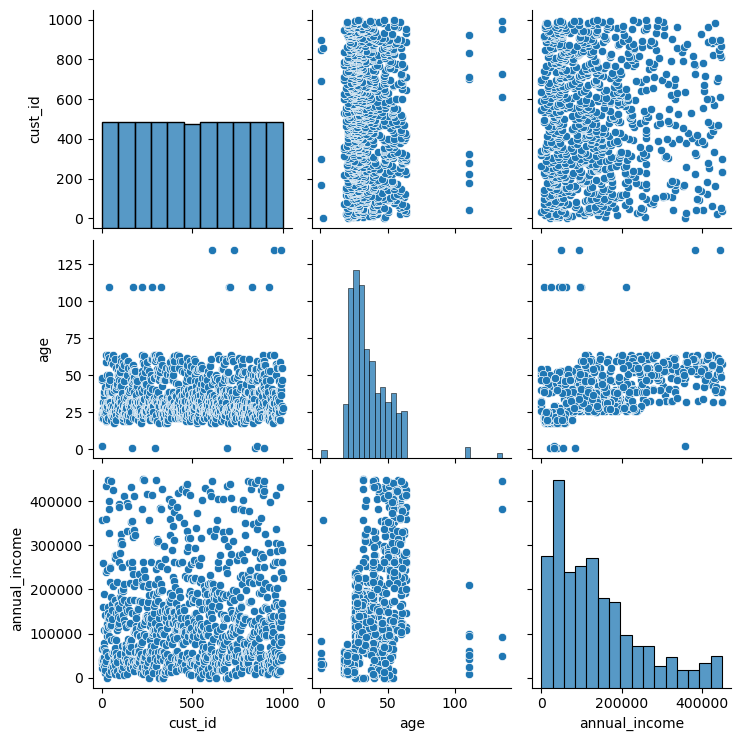

In [283]:
sns.pairplot(df_cust)

<Axes: xlabel='gender', ylabel='annual_income'>

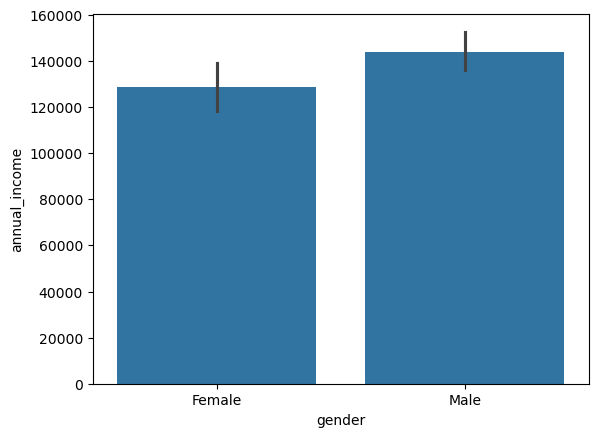

In [284]:
sns.barplot(x='gender',y='annual_income', data=df_cust)

In [287]:
df_cust.age.describe()

count    1000.000000
mean       36.405000
std        15.666155
min         1.000000
25%        26.000000
50%        32.000000
75%        46.000000
max       135.000000
Name: age, dtype: float64

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Business Owner'),
  Text(1, 0, 'Consultant'),
  Text(2, 0, 'Freelancer'),
  Text(3, 0, 'Fullstack Developer'),
  Text(4, 0, 'Accountant'),
  Text(5, 0, 'Data Scientist'),
  Text(6, 0, 'Artist')])

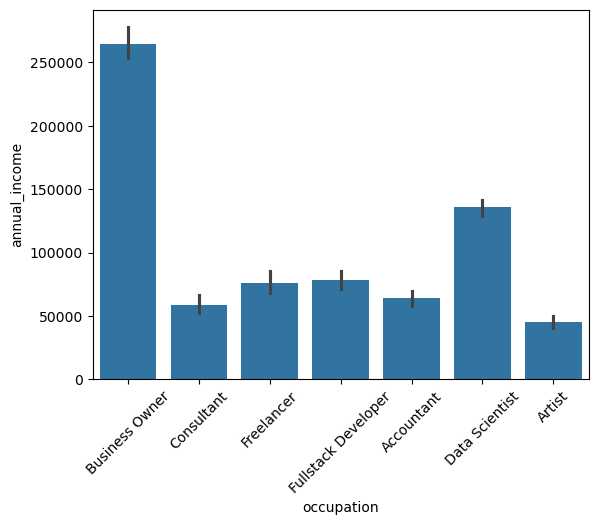

In [289]:
sns.barplot(x='occupation',y='annual_income', data=df_cust)
plt.xticks(rotation=45)

([0, 1], [Text(0, 0, 'Married'), Text(1, 0, 'Single')])

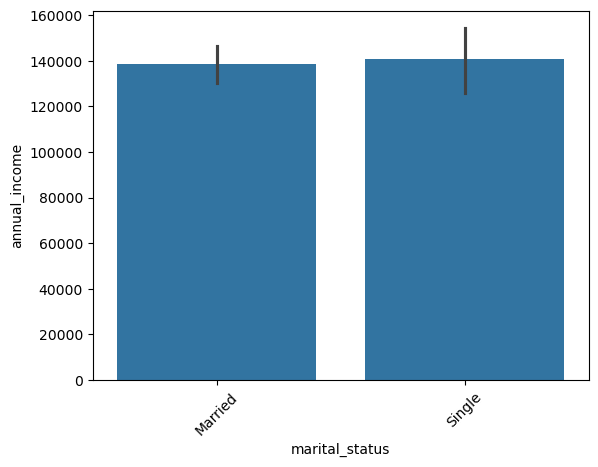

In [291]:
sns.barplot(x='marital_status',y='annual_income', data=df_cust)
plt.xticks(rotation=45)

In [293]:
columns=[  'gender',  'location', 'occupation',
        'marital_status']

In [295]:
columns

['gender', 'location', 'occupation', 'marital_status']

In [297]:
def barplot(feature):
    sns.barplot(x=feature,y='annual_income', data=df_cust)
    plt.xticks(rotation=45)
    plt.show()
    

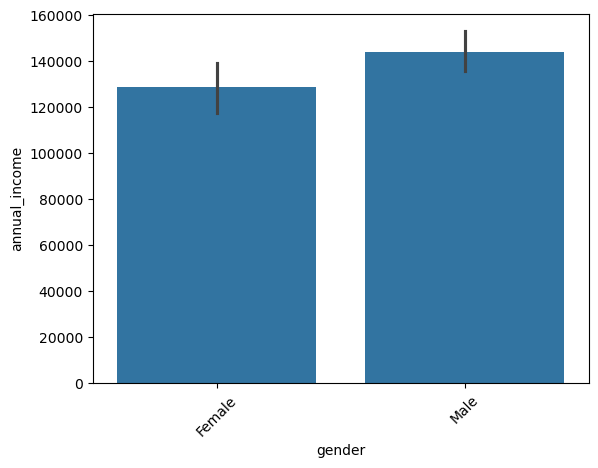

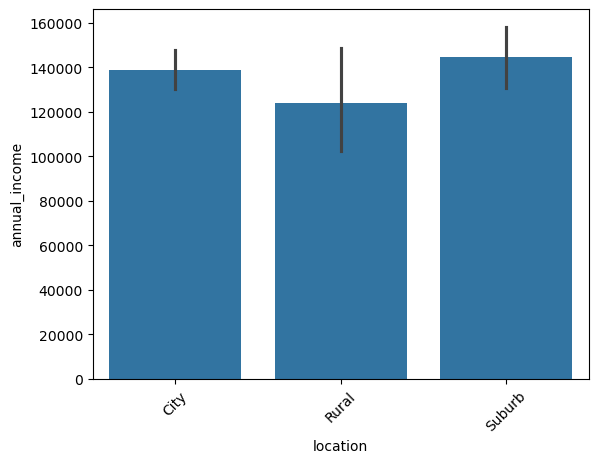

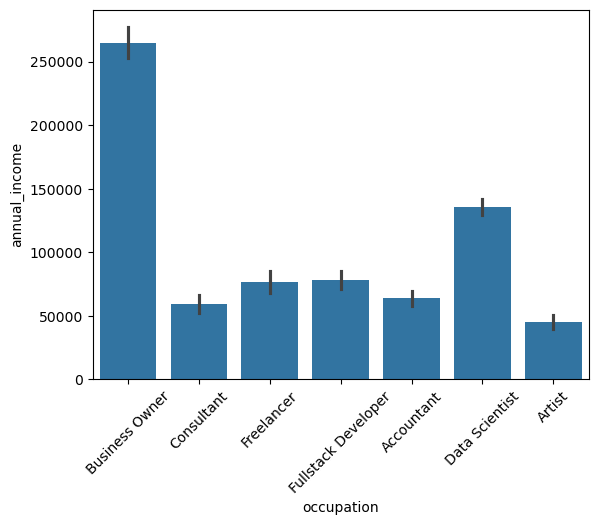

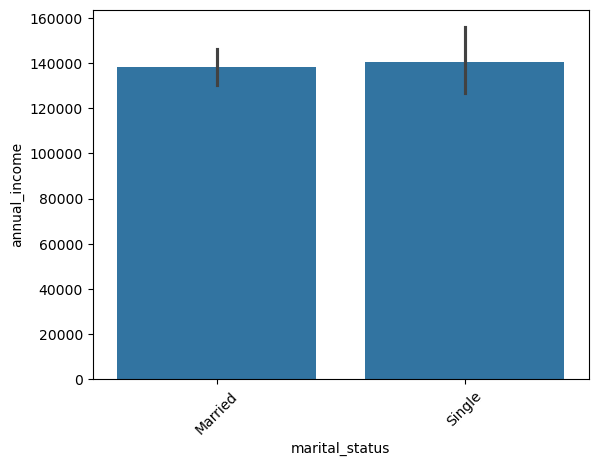

In [299]:
for feature in columns:
    barplot(feature)

In [309]:
outlier_df=df_cust[(df_cust.age<15)|(df_cust.age>80)]

In [311]:
outlier_df

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,358211.0,Married
41,42,Aaryan Shah,Male,110,City,Artist,7621.0,Married
165,166,Sia Dutta,Female,1,City,Freelancer,39721.0,Single
174,175,Rohan Sharma,Male,110,City,Freelancer,23723.0,Married
222,223,Arjun Batra,Male,110,Suburb,Freelancer,210987.0,Married
277,278,Aarav Tandon,Male,110,City,Consultant,96522.0,Single
295,296,Ayush Pandey,Male,1,Rural,Accountant,55254.0,Married
325,326,Virat Goel,Male,110,City,Accountant,61021.0,Single
610,611,Rehan Verma,Male,135,Rural,Business Owner,444776.0,Married
692,693,Dhruv Jha,Male,1,City,Business Owner,83045.0,Married


In [305]:
df_OA= df_age_occ_median.to_dict()

AttributeError: 'Series' object has no attribute 'occupation'

In [315]:
median_occu= df_cust.groupby('occupation')['age'].median()

In [319]:
for index, row in outlier_df.iterrows():
    if pd.notnull(row['age']):
        print(index)
        occupation= df_cust[index,'occupation']
        df_cust.at[index,'age']= median_occu[occupation]
    

0


KeyError: (0, 'occupation')

In [323]:
for index, row in outlier_df.iterrows():
    if pd.notnull(row['age']):
        occupation = df_cust.at[index, 'occupation']
        df_cust.at[index, 'age'] = median_occu[occupation]

/var/folders/_g/4tg8f_fn5559zxcgb1vxkn3w0000gn/T/ipykernel_42610/2919823830.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '31.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_cust.at[index, 'age'] = median_occu[occupation]


In [327]:
median_occu=median_occu.to_dict()

In [329]:
median_occu

{'Accountant': 31.5,
 'Artist': 26.0,
 'Business Owner': 51.0,
 'Consultant': 46.0,
 'Data Scientist': 32.0,
 'Freelancer': 24.0,
 'Fullstack Developer': 27.5}

In [335]:
outlier_id= outlier_df.cust_id

In [341]:
outlier_median_ages= df_cust.loc[ df_cust.cust_id.isin(outlier_id),'occupation'].map(median_occu)

In [343]:
outlier_median_ages

0      51.0
41     26.0
165    24.0
174    24.0
222    24.0
277    46.0
295    31.5
325    31.5
610    51.0
692    51.0
703    24.0
709    32.0
728    51.0
832    27.5
845    46.0
855    27.5
895    24.0
923    24.0
951    32.0
991    27.5
Name: occupation, dtype: float64

In [347]:
df_cust.loc[df_cust['cust_id'].isin(outlier_id), 'age'] = outlier_median_ages


In [349]:
df_cust[(df_cust.age<15)|(df_cust.age>80)]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status


In [351]:
bin_edges=[17,25,48,65]
bin_labels=['18-25','26-48','49-65']

In [363]:
df_cust['age_group'] =pd.cut(df_cust['age'],bins=bin_edges,labels=bin_labels)

In [365]:
df_cust.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65
1,2,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single,26-48
2,3,Aaryan Chauhan,Male,21.0,City,Freelancer,22378.0,Married,18-25
3,4,Rudra Bali,Male,24.0,Rural,Freelancer,33563.0,Married,18-25
4,5,Advait Malik,Male,48.0,City,Consultant,39406.0,Married,26-48


In [373]:
df_cust['age_group'].value_counts(normalize=True)*100

age_group
26-48    56.7
18-25    24.6
49-65    18.7
Name: proportion, dtype: float64

In [371]:
df_cust['age_group'].value_counts(normalize=True)*100

age_group
26-48    56.7
18-25    24.6
49-65    18.7
Name: proportion, dtype: float64

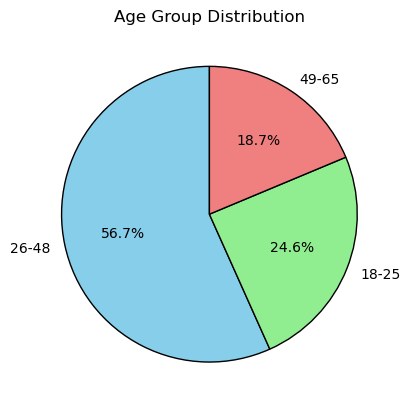

In [375]:
import matplotlib.pyplot as plt

# Plotting the pie chart
df_cust['age_group'].value_counts(normalize=True).plot.pie(autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'lightcoral'], startangle=90, wedgeprops={'edgecolor': 'black'})

# Adding labels
plt.ylabel('')
plt.title('Age Group Distribution')

# Display the plot
plt.show()


In [381]:
cust_gender_loc= df_cust.groupby(['location','gender']).size().unstack(fill_value=0)

In [383]:
cust_gender_loc

gender,Female,Male
location,,
City,226,457
Rural,26,59
Suburb,74,158


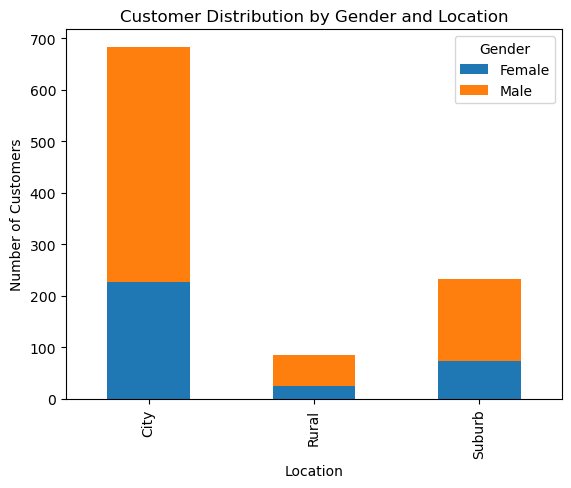

In [385]:
import matplotlib.pyplot as plt

# Assuming cust_gender_loc is already created
cust_gender_loc.plot(kind='bar', stacked=True)

# Set labels and title
plt.xlabel('Location')
plt.ylabel('Number of Customers')
plt.title('Customer Distribution by Gender and Location')

# Display the plot
plt.legend(title='Gender')
plt.show()


In [389]:
df_cs= pd.read_csv('credit_profiles.csv')

In [393]:
df_cs.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
0,1,749,0.585171,19571.0,0.0,40000.0
1,2,587,0.107928,161644.0,2.0,1250.0
2,3,544,0.854807,513.0,4.0,1000.0
3,4,504,0.336938,224.0,2.0,1000.0
4,5,708,0.586151,18090.0,2.0,40000.0


In [395]:
df_cs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   cust_id                         1004 non-null   int64  
 1   credit_score                    1004 non-null   int64  
 2   credit_utilisation              1000 non-null   float64
 3   outstanding_debt                1000 non-null   float64
 4   credit_inquiries_last_6_months  1000 non-null   float64
 5   credit_limit                    935 non-null    float64
dtypes: float64(4), int64(2)
memory usage: 47.2 KB


In [397]:
df_cs.describe()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
count,1004.000000,1004.000000,1000.000000,1000.000000,1000.000000,935.000000
mean,500.850598,588.655378,0.498950,9683.597000,1.955000,19235.561497
std,288.315670,152.575244,0.233139,25255.893671,1.414559,24489.997195
min,1.000000,300.000000,0.103761,33.000000,0.000000,500.000000
25%,251.750000,459.000000,0.293917,221.000000,1.000000,750.000000
50%,502.500000,601.000000,0.487422,550.000000,2.000000,1250.000000
75%,749.250000,737.250000,0.697829,11819.500000,3.000000,40000.000000
max,1000.000000,799.000000,0.899648,209901.000000,4.000000,60000.000000


In [399]:
df_cs.isna().sum()

cust_id                            0
credit_score                       0
credit_utilisation                 4
outstanding_debt                   4
credit_inquiries_last_6_months     4
credit_limit                      69
dtype: int64

In [413]:
df_cs.cust_id.duplicated().value_counts()

cust_id
False    1000
True        4
Name: count, dtype: int64

In [419]:
df_cs.drop_duplicates(subset='cust_id',keep='last',inplace=True)

In [421]:
df_clean1= df_cs.copy()

In [423]:
df_clean1.shape

(1000, 6)

In [427]:
df_clean1[['credit_utilisation','outstanding_debt','credit_inquiries_last_6_months']].dropna(inplace=True)

/var/folders/_g/4tg8f_fn5559zxcgb1vxkn3w0000gn/T/ipykernel_42610/3660637739.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean1[['credit_utilisation','outstanding_debt','credit_inquiries_last_6_months']].dropna(inplace=True)


In [431]:
df_clean1.isna().sum()

cust_id                            0
credit_score                       0
credit_utilisation                 0
outstanding_debt                   0
credit_inquiries_last_6_months     0
credit_limit                      65
dtype: int64

In [433]:
df_clean1[df_clean1.credit_limit.isna()]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
10,11,679,0.557450,9187.0,2.0,NaN
35,36,790,0.112535,4261.0,1.0,NaN
37,38,514,0.296971,238.0,2.0,NaN
45,46,761,0.596041,24234.0,2.0,NaN
64,65,734,0.473715,13631.0,0.0,NaN
...,...,...,...,...,...,...
912,909,479,0.487555,320.0,3.0,NaN
931,928,311,0.832244,316.0,2.0,NaN
948,945,526,0.272734,227.0,1.0,NaN
954,951,513,0.175914,131.0,3.0,NaN


In [445]:
df_clean1.credit_score.unique()

array([749, 587, 544, 504, 708, 442, 747, 482, 537, 567, 679, 429, 476,
       623, 640, 347, 702, 546, 447, 647, 381, 785, 371, 489, 673, 758,
       766, 729, 724, 798, 437, 768, 516, 396, 414, 790, 417, 514, 734,
       780, 741, 530, 397, 435, 757, 761, 604, 733, 357, 535, 549, 613,
       630, 612, 481, 539, 438, 793, 356, 344, 559, 334, 388, 611, 518,
       303, 625, 323, 754, 592, 390, 750, 349, 632, 407, 770, 558, 664,
       512, 695, 789, 791, 418, 465, 311, 711, 737, 406, 542, 492, 472,
       783, 774, 792, 633, 553, 756, 500, 755, 444, 765, 578, 619, 315,
       372, 767, 556, 601, 777, 775, 736, 585, 320, 522, 452, 302, 493,
       340, 470, 328, 594, 643, 589, 778, 520, 618, 728, 593, 655, 760,
       575, 726, 681, 713, 448, 771, 759, 551, 709, 503, 555, 460, 434,
       550, 717, 743, 469, 786, 752, 725, 696, 479, 502, 483, 637, 794,
       557, 534, 332, 577, 548, 430, 301, 419, 451, 561, 732, 536, 703,
       698, 358, 405, 337, 721, 499, 329, 641, 531, 629, 657, 35

In [449]:
df_clean1.credit_score.value_counts()

credit_score
799    8
771    8
736    8
769    7
766    7
      ..
393    1
608    1
692    1
407    1
564    1
Name: count, Length: 419, dtype: int64

In [453]:
df_clean1.credit_limit.unique()

array([40000.,  1250.,  1000.,   500.,   750.,    nan,  1500., 60000.,
       20000.])

In [455]:
df_clean1.credit_limit.value_counts()

credit_limit
500.0      229
60000.0    186
40000.0    137
1500.0     100
1000.0      90
750.0       76
1250.0      75
20000.0     42
Name: count, dtype: int64

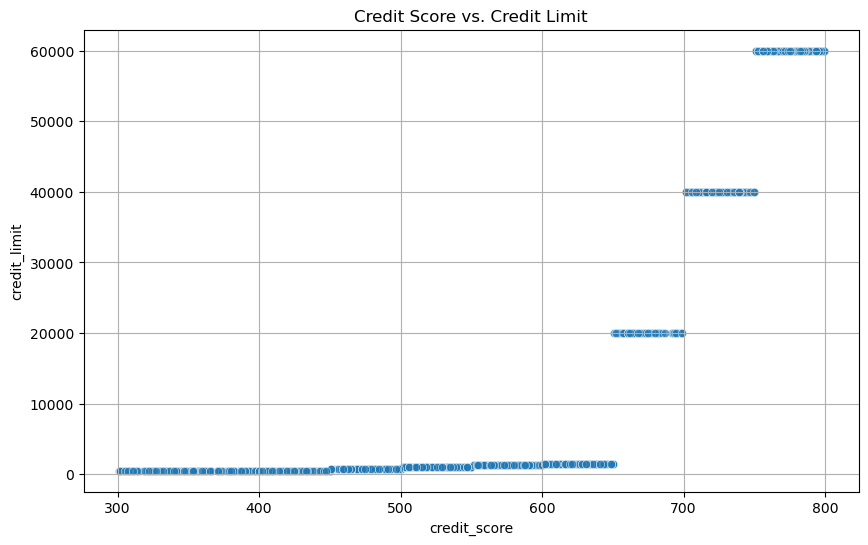

In [457]:
import seaborn as sns

# Assuming df_clean1 is your DataFrame
plt.figure(figsize=(10, 6))
sns.scatterplot(x='credit_score', y='credit_limit', data=df_clean1, alpha=0.7)
plt.title('Credit Score vs. Credit Limit')
plt.grid()
plt.show()


In [465]:
bin_ranges=[300, 450, 500, 550, 600, 650, 700, 750, 800]
bin_labels=[f'{start}-{end-1}' for start, end in zip(bin_ranges, bin_ranges[1:])]
df_clean1['credit_score_range']= pd.cut(df_clean1['credit_score'], bins=bin_ranges, labels=bin_labels, include_lowest=True, right=False)

In [467]:
df_clean1.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range
0,1,749,0.585171,19571.0,0.0,40000.0,700-749
1,2,587,0.107928,161644.0,2.0,1250.0,550-599
2,3,544,0.854807,513.0,4.0,1000.0,500-549
3,4,504,0.336938,224.0,2.0,1000.0,500-549
4,5,708,0.586151,18090.0,2.0,40000.0,700-749


In [479]:
mode_credit= df_clean1.groupby('credit_score_range')['credit_limit'].agg(lambda x: x.mode().iloc[0]).reset_index()
mode_credit

/var/folders/_g/4tg8f_fn5559zxcgb1vxkn3w0000gn/T/ipykernel_42610/2151253306.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mode_credit= df_clean1.groupby('credit_score_range')['credit_limit'].agg(lambda x: x.mode().iloc[0]).reset_index()


,credit_score_range,credit_limit
0,300-449,500.0
1,450-499,750.0
2,500-549,1000.0
3,550-599,1250.0
4,600-649,1500.0
5,650-699,20000.0
6,700-749,40000.0
7,750-799,60000.0


In [481]:
df_clean2= pd.merge(df_clean1, mode_credit, on= 'credit_score_range',suffixes=('','_mode') )

In [483]:
df_clean2.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
0,1,749,0.585171,19571.0,0.0,40000.0,700-749,40000.0
1,2,587,0.107928,161644.0,2.0,1250.0,550-599,1250.0
2,3,544,0.854807,513.0,4.0,1000.0,500-549,1000.0
3,4,504,0.336938,224.0,2.0,1000.0,500-549,1000.0
4,5,708,0.586151,18090.0,2.0,40000.0,700-749,40000.0


In [487]:
df_clean2.credit_limit.fillna(df_clean2.credit_limit_mode,inplace=True)

/var/folders/_g/4tg8f_fn5559zxcgb1vxkn3w0000gn/T/ipykernel_42610/3884012892.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean2.credit_limit.fillna(df_clean2.credit_limit_mode,inplace=True)


In [491]:
df_clean2.isna().sum()

cust_id                           0
credit_score                      0
credit_utilisation                0
outstanding_debt                  0
credit_inquiries_last_6_months    0
credit_limit                      0
credit_score_range                0
credit_limit_mode                 0
dtype: int64

<Axes: ylabel='outstanding_debt'>

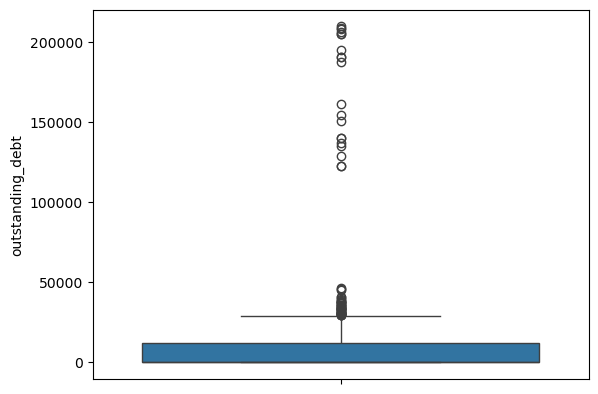

In [493]:
sns.boxplot(df_clean2.outstanding_debt)

In [501]:
df_clean2.replace(df_clean2.outstanding_debt[(df_clean2.outstanding_debt> df_clean2.credit_limit), df_clean2.credit_limit])

KeyError: 'key of type tuple not found and not a MultiIndex'

In [505]:
df_clean2.loc[df_clean2.outstanding_debt> df_clean2.credit_limit,'outstanding_debt']= df_clean2.credit_limit

In [507]:
df_clean2.loc[df_clean2.outstanding_debt> df_clean2.credit_limit]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode


In [509]:
df_merged= pd.merge(df_cust,df_clean2, on='cust_id', how='inner')

In [515]:
df_merged.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,0.585171,19571.0,0.0,40000.0,700-749
1,2,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single,26-48,587,0.107928,1250.0,2.0,1250.0,550-599
2,3,Aaryan Chauhan,Male,21.0,City,Freelancer,22378.0,Married,18-25,544,0.854807,513.0,4.0,1000.0,500-549
3,4,Rudra Bali,Male,24.0,Rural,Freelancer,33563.0,Married,18-25,504,0.336938,224.0,2.0,1000.0,500-549
4,5,Advait Malik,Male,48.0,City,Consultant,39406.0,Married,26-48,708,0.586151,18090.0,2.0,40000.0,700-749


In [513]:
df_merged.drop(columns='credit_limit_mode',inplace=True)

In [517]:
numerical_cols = ['credit_score', 'credit_utilisation', 'outstanding_debt', 'credit_limit', 'annual_income','age']
correlation_matrix= df_merged[numerical_cols].corr()

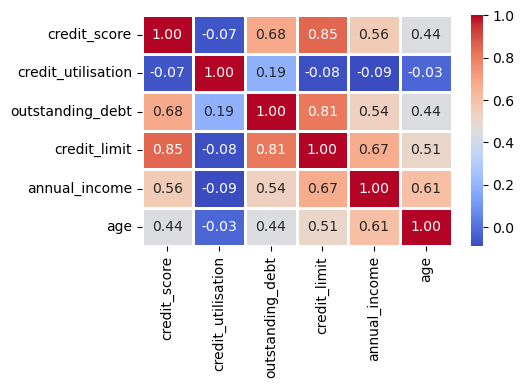

In [519]:
plt.figure(figsize=(5, 3))
sns.heatmap(correlation_matrix,annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.8)
plt.show()

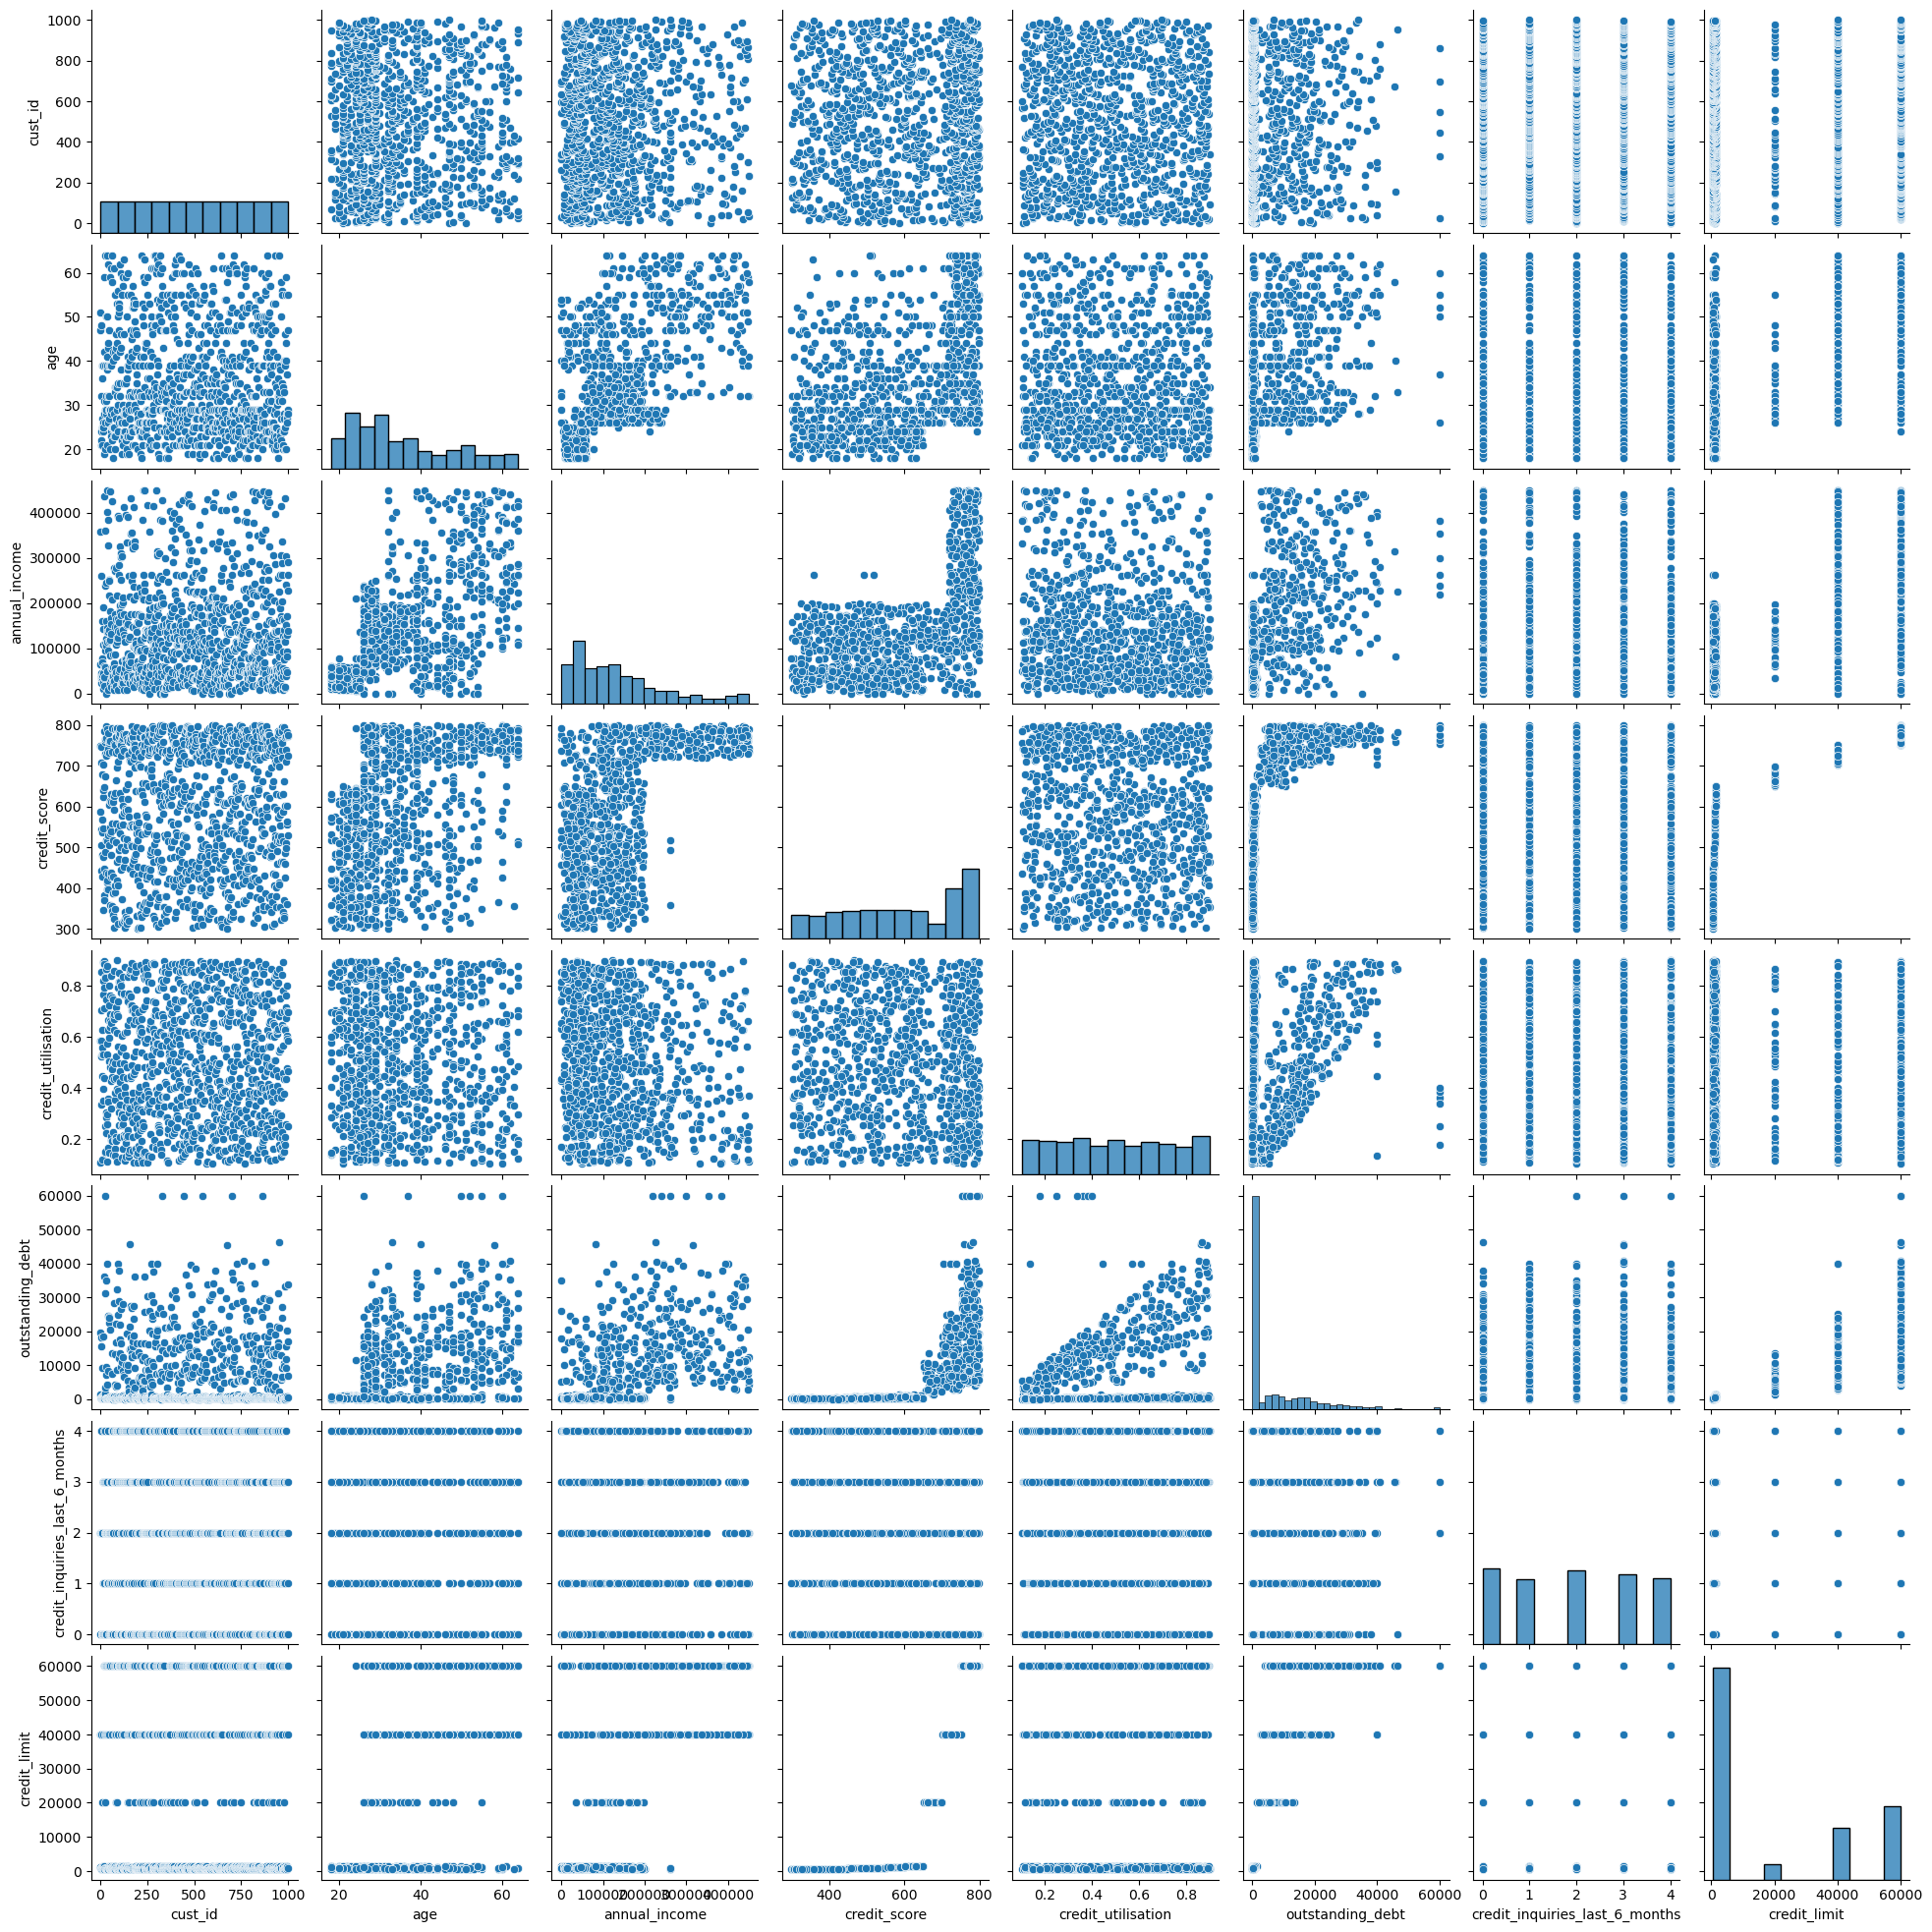

In [521]:
sns.pairplot(df_merged)

In [525]:
df_trans.head()


,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking


In [527]:
df_trans.isna().sum()

tran_id                0
cust_id                0
tran_date              0
tran_amount            0
platform            4941
product_category       0
payment_type           0
dtype: int64

In [529]:
df_trans.describe()

,tran_id,cust_id,tran_amount
count,500000.000000,500000.000000,500000.00000
mean,250000.500000,501.400428,3225.20733
std,144337.711634,288.641924,13098.74276
min,1.000000,1.000000,0.00000
25%,125000.750000,252.000000,64.00000
50%,250000.500000,502.000000,141.00000
75%,375000.250000,752.000000,397.00000
max,500000.000000,1000.000000,69999.00000


In [531]:
df_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   tran_id           500000 non-null  int64 
 1   cust_id           500000 non-null  int64 
 2   tran_date         500000 non-null  object
 3   tran_amount       500000 non-null  int64 
 4   platform          495059 non-null  object
 5   product_category  500000 non-null  object
 6   payment_type      500000 non-null  object
dtypes: int64(3), object(4)
memory usage: 26.7+ MB


In [535]:
df_trans.sample(100)

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
466783,466784,27,2023-08-20,191,Flipkart,Home Decor,Phonepe
351009,351010,994,2023-06-24,890,Amazon,Electronics,Gpay
105776,105777,477,2023-02-22,85,Amazon,Kitchen Appliances,Phonepe
455984,455985,455,2023-08-15,78,Amazon,Fashion & Apparel,Phonepe
447005,447006,461,2023-08-10,120,Alibaba,Beauty & Personal Care,Net Banking
...,...,...,...,...,...,...,...
339150,339151,872,2023-06-18,347,Alibaba,Sports,Phonepe
371015,371016,793,2023-07-04,87,Amazon,Fashion & Apparel,Credit Card
299685,299686,364,2023-05-29,744,Ebay,Electronics,Phonepe
167803,167804,722,2023-03-25,794,Flipkart,Electronics,Gpay


In [537]:
df_trans.groupby('product_category')['platform']

In [539]:
category_platform_count = df_trans.groupby('product_category')['platform'].value_counts()
print(category_platform_count)


product_category        platform
Beauty & Personal Care  Amazon      16581
                        Flipkart    14013
                        Alibaba      8475
                        Meesho       8013
                        Shopify      4475
                                    ...  
Toys & Games            Meesho       1521
                        Alibaba      1432
                        Shopify       757
                        Cred          460
                        Ebay          194
Name: count, Length: 63, dtype: int64


<Axes: xlabel='count', ylabel='product_category'>

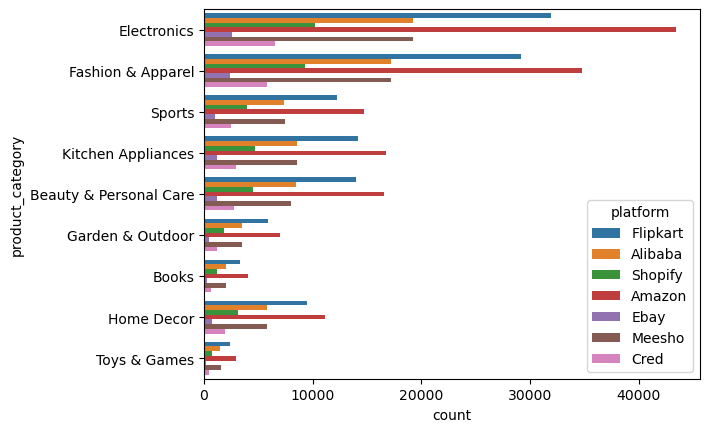

In [545]:
sns.countplot(y='product_category',hue='platform',data=df_trans)

In [547]:
df_trans.platform.fillna('Amazon',inplace=True)

In [549]:
df_trans.isna().sum()

tran_id             0
cust_id             0
tran_date           0
tran_amount         0
platform            0
product_category    0
payment_type        0
dtype: int64

In [551]:
df_trans.describe()

,tran_id,cust_id,tran_amount
count,500000.000000,500000.000000,500000.00000
mean,250000.500000,501.400428,3225.20733
std,144337.711634,288.641924,13098.74276
min,1.000000,1.000000,0.00000
25%,125000.750000,252.000000,64.00000
50%,250000.500000,502.000000,141.00000
75%,375000.250000,752.000000,397.00000
max,500000.000000,1000.000000,69999.00000


In [553]:
df_trans.product_category.nunique()

9

In [555]:
df_trans.platform.nunique()

7

In [561]:
df_nonzero= df_trans[df_trans.tran_amount!=0]
df_nonzero

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking
...,...,...,...,...,...,...,...
499995,499996,791,2023-09-05,43,Amazon,Books,Phonepe
499996,499997,569,2023-09-05,53022,Meesho,Fashion & Apparel,Net Banking
499997,499998,57,2023-09-05,224,Amazon,Garden & Outdoor,Phonepe
499998,499999,629,2023-09-05,538,Flipkart,Home Decor,Gpay


In [565]:
median_toreplace= df_nonzero.groupby('platform')['tran_amount'].median()

In [569]:
median_toreplace=median_toreplace.to_dict()

In [571]:
median_toreplace

{'Alibaba': 143.0,
 'Amazon': 144.0,
 'Cred': 145.0,
 'Ebay': 142.0,
 'Flipkart': 142.0,
 'Meesho': 142.0,
 'Shopify': 143.0}

In [573]:
df_trans['tran_amount'] = df_trans.apply(
    lambda row: median_toreplace[row['platform']] if row['tran_amount'] == 0 else row['tran_amount'],
    axis=1
)

In [575]:
df_trans.tran_amount.describe()

count    500000.000000
mean       3226.570722
std       13098.414480
min           2.000000
25%          66.000000
50%         144.000000
75%         397.000000
max       69999.000000
Name: tran_amount, dtype: float64

In [587]:
Q1,Q3= df_trans.tran_amount.quantile([0.25,0.75])
IQR= Q3-Q1
upper= Q3 + 2*IQR
lower= Q1 - 2*IQR

In [589]:
IQR, upper, lower

(331.0, 1059.0, -596.0)

In [593]:
df_trans[((df_trans.tran_amount>upper)|(df_trans.tran_amount<lower))]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
26,27,380,2023-01-01,61963.0,Shopify,Beauty & Personal Care,Credit Card
49,50,287,2023-01-01,57869.0,Amazon,Toys & Games,Gpay
94,95,770,2023-01-01,52881.0,Ebay,Kitchen Appliances,Credit Card
104,105,549,2023-01-01,58574.0,Flipkart,Fashion & Apparel,Gpay
113,114,790,2023-01-01,51669.0,Shopify,Kitchen Appliances,Credit Card
...,...,...,...,...,...,...,...
499742,499743,868,2023-09-05,55131.0,Meesho,Fashion & Apparel,Gpay
499888,499889,614,2023-09-05,59679.0,Meesho,Fashion & Apparel,Net Banking
499900,499901,811,2023-09-05,60184.0,Flipkart,Sports,Debit Card
499966,499967,662,2023-09-05,54678.0,Meesho,Sports,Gpay


In [595]:
df_trans['tran_amount'] = df_trans.apply(
    lambda row: median_toreplace[row['platform']] if ((row['tran_amount'] >upper)|(row['tran_amount']<lower)) else row['tran_amount'],
    axis=1
)

In [597]:
df_trans[((df_trans.tran_amount>upper)|(df_trans.tran_amount<lower))]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type


<Axes: xlabel='tran_amount', ylabel='Count'>

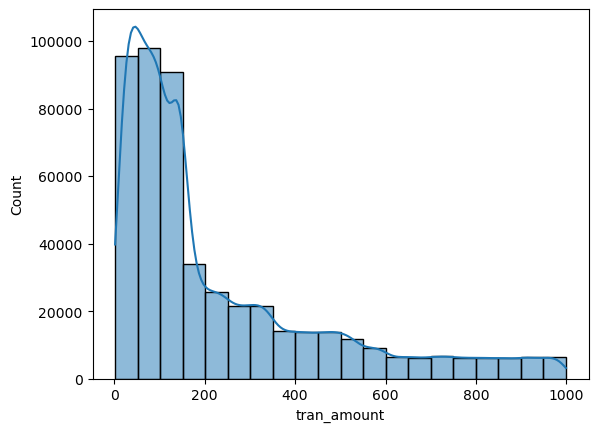

In [599]:
sns.histplot(x='tran_amount', data=df_trans, bins=20, kde=True)

In [603]:
df_merged2= pd.merge(df_merged, df_trans, on='cust_id',how='inner')

In [605]:
df_merged2.columns

Index(['cust_id', 'name', 'gender', 'age', 'location', 'occupation',
       'annual_income', 'marital_status', 'age_group', 'credit_score',
       'credit_utilisation', 'outstanding_debt',
       'credit_inquiries_last_6_months', 'credit_limit', 'credit_score_range',
       'tran_id', 'tran_date', 'tran_amount', 'platform', 'product_category',
       'payment_type'],
      dtype='object')

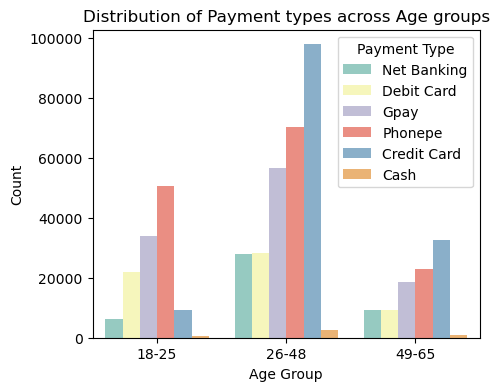

In [609]:
plt.figure(figsize=(5, 4))
sns.countplot(x='age_group', hue='payment_type', data=df_merged2, palette='Set3')
plt.title('Distribution of Payment types across Age groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Payment Type', loc='upper right')

plt.show()

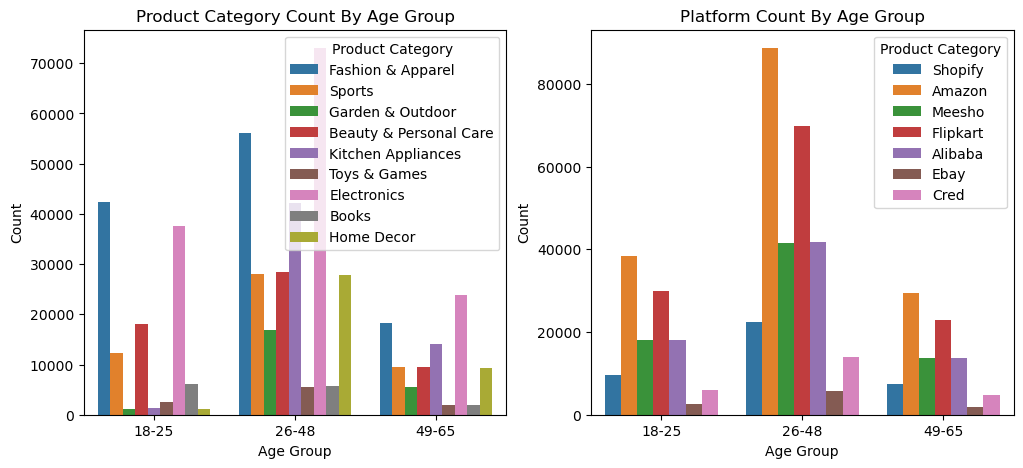

In [613]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))

sns.countplot(x='age_group', hue="product_category", data=df_merged2, ax=ax1)
ax1.set_title("Product Category Count By Age Group")
ax1.set_xlabel("Age Group")
ax1.set_ylabel("Count")
ax1.legend(title="Product Category", loc='upper right')

sns.countplot(x='age_group', hue="platform", data=df_merged2, ax=ax2)
ax2.set_title("Platform Count By Age Group")
ax2.set_xlabel("Age Group")
ax2.set_ylabel("Count")
ax2.legend(title="Product Category", loc='upper right')

plt.show()

/var/folders/_g/4tg8f_fn5559zxcgb1vxkn3w0000gn/T/ipykernel_42610/1218817480.py:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=cat_col, y='tran_amount', data=sorted_data, ci=None, ax=axes[i], palette='tab10')
/var/folders/_g/4tg8f_fn5559zxcgb1vxkn3w0000gn/T/ipykernel_42610/1218817480.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cat_col, y='tran_amount', data=sorted_data, ci=None, ax=axes[i], palette='tab10')
/var/folders/_g/4tg8f_fn5559zxcgb1vxkn3w0000gn/T/ipykernel_42610/1218817480.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
/var/folders/_g/4tg8f_fn5559zxcgb1vxkn3w0000gn/T/ipykernel_42610/1218817480.py:19: Fu

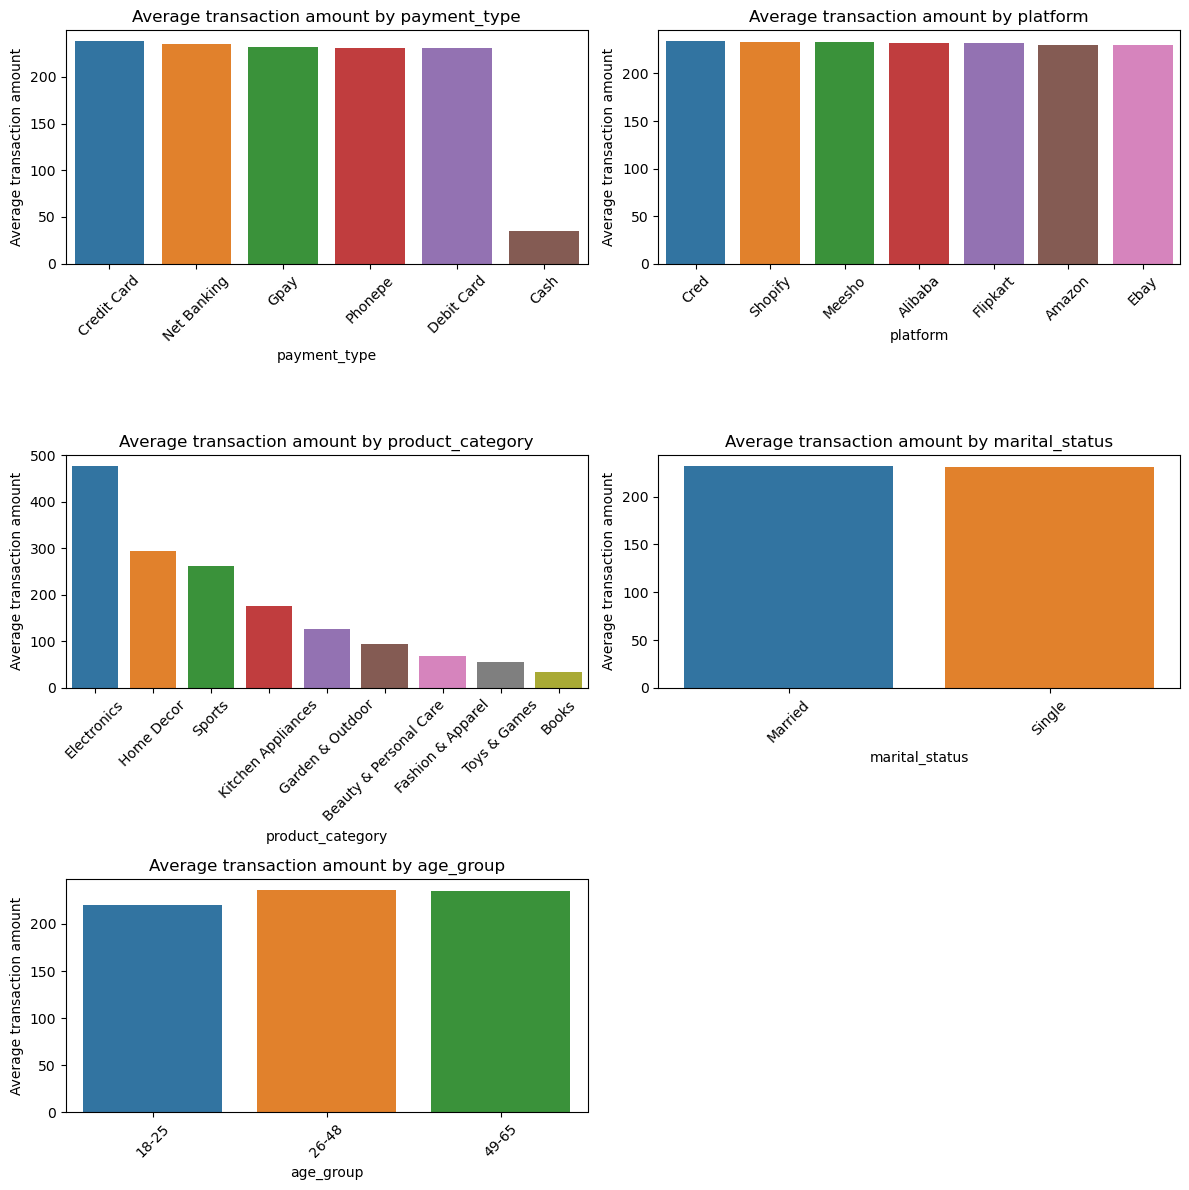

In [617]:
# List of categorical columns
cat_cols = ['payment_type', 'platform', 'product_category', 'marital_status', 'age_group']

num_rows = 3
# Create subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(12, 4 * num_rows))

# Flatten the axes array to make it easier to iterate
axes = axes.flatten()

# Create subplots for each categorical column
for i, cat_col in enumerate(cat_cols):
    # Calculate the average annual income for each category
    avg_tran_amount_by_category = df_merged2.groupby(cat_col)['tran_amount'].mean().reset_index()
    
    # Sort the data by 'annual_income' before plotting
    sorted_data = avg_tran_amount_by_category.sort_values(by='tran_amount', ascending=False)
    
    sns.barplot(x=cat_col, y='tran_amount', data=sorted_data, ci=None, ax=axes[i], palette='tab10')
    axes[i].set_title(f'Average transaction amount by {cat_col}')
    axes[i].set_xlabel(cat_col)
    axes[i].set_ylabel('Average transaction amount')

    # Rotate x-axis labels for better readability
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

# Hide any unused subplots
for i in range(len(cat_cols), len(axes)):
    fig.delaxes(axes[i])
plt.tight_layout()
plt.show()

In [619]:
age_group_metrics = df_merged.groupby('age_group')[['annual_income', 'credit_limit', 'credit_score']].mean().reset_index()
age_group_metrics

/var/folders/_g/4tg8f_fn5559zxcgb1vxkn3w0000gn/T/ipykernel_42610/2478570349.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_metrics = df_merged.groupby('age_group')[['annual_income', 'credit_limit', 'credit_score']].mean().reset_index()


,age_group,annual_income,credit_limit,credit_score
0,18-25,37091.235772,1130.081301,484.451220
1,26-48,144129.791005,20560.846561,597.569665
2,49-65,257062.727273,41699.197861,701.524064


/var/folders/_g/4tg8f_fn5559zxcgb1vxkn3w0000gn/T/ipykernel_42610/2606875490.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='age_group', y='annual_income', data=age_group_metrics, palette='tab10', ax=ax1)
/var/folders/_g/4tg8f_fn5559zxcgb1vxkn3w0000gn/T/ipykernel_42610/2606875490.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='age_group', y='credit_limit', data=age_group_metrics, palette='hls', ax=ax2)
/var/folders/_g/4tg8f_fn5559zxcgb1vxkn3w0000gn/T/ipykernel_42610/2606875490.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplo

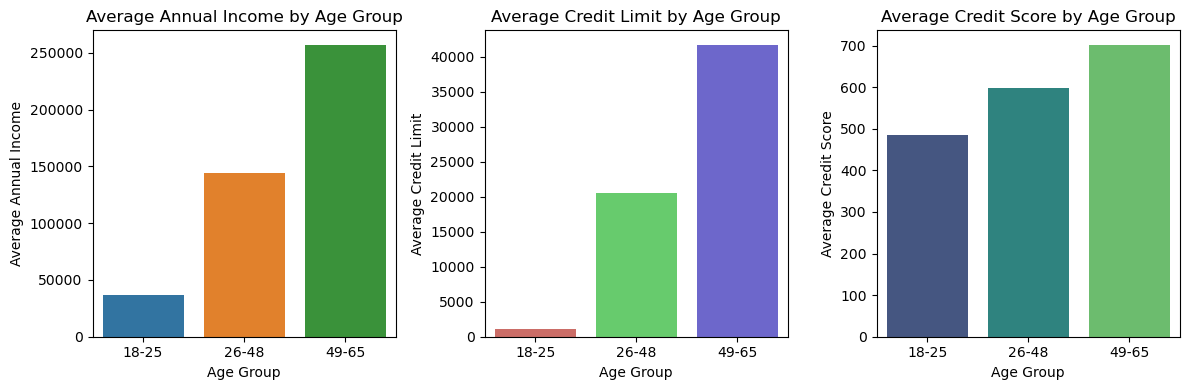

In [621]:
# Create subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))

# Plot 1: Average annual income by age group
sns.barplot(x='age_group', y='annual_income', data=age_group_metrics, palette='tab10', ax=ax1)
ax1.set_title('Average Annual Income by Age Group')
ax1.set_xlabel('Age Group')
ax1.set_ylabel('Average Annual Income')
ax1.tick_params(axis='x', rotation=0)

# Plot 2: Average Max Credit Limit by Age Group
sns.barplot(x='age_group', y='credit_limit', data=age_group_metrics, palette='hls', ax=ax2)
ax2.set_title('Average Credit Limit by Age Group')
ax2.set_xlabel('Age Group')
ax2.set_ylabel('Average Credit Limit')
ax2.tick_params(axis='x', rotation=0)

# Plot 3: Average Credit Score by Age Group
sns.barplot(x='age_group', y='credit_score', data=age_group_metrics, palette='viridis', ax=ax3)
ax3.set_title('Average Credit Score by Age Group')
ax3.set_xlabel('Age Group')
ax3.set_ylabel('Average Credit Score')
ax3.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

In [623]:
df_merged2.sample(30)

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group,credit_score,...,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,tran_id,tran_date,tran_amount,platform,product_category,payment_type
34783,70,Rehan Agarwal,Male,18.0,City,Freelancer,37815.0,Married,18-25,518,...,435.0,0.0,1000.0,500-549,314996,2023-06-06,96.0,Amazon,Fashion & Apparel,Phonepe
481297,963,Rehan Rana,Male,27.0,City,Data Scientist,170596.0,Married,26-48,465,...,442.0,1.0,750.0,450-499,374372,2023-07-05,215.0,Flipkart,Electronics,Gpay
409346,820,Arjun Dua,Male,52.0,City,Business Owner,243585.0,Married,49-65,795,...,18694.0,4.0,60000.0,750-799,186980,2023-04-03,103.0,Meesho,Fashion & Apparel,Phonepe
329017,660,Amaira Mangal,Female,35.0,City,Data Scientist,181052.0,Married,26-48,685,...,4828.0,3.0,20000.0,650-699,266772,2023-05-13,151.0,Meesho,Beauty & Personal Care,Credit Card
172882,348,Suhani Bose,Female,53.0,Suburb,Consultant,49156.0,Married,49-65,710,...,13569.0,4.0,40000.0,700-749,14129,2023-01-07,236.0,Shopify,Sports,Gpay
75946,153,Amaira Mukherjee,Female,30.0,Suburb,Fullstack Developer,74531.0,Married,26-48,681,...,2129.0,3.0,20000.0,650-699,95042,2023-02-17,20.0,Cred,Beauty & Personal Care,Gpay
389609,781,Aarya Kulkarni,Male,52.0,City,Consultant,44421.0,Single,49-65,702,...,16270.0,4.0,40000.0,700-749,55306,2023-01-28,481.0,Flipkart,Home Decor,Gpay
73383,148,Rishabh Banerjee,Male,55.0,City,Business Owner,88579.0,Single,49-65,592,...,690.0,1.0,1250.0,550-599,50412,2023-01-25,101.0,Alibaba,Electronics,Credit Card
239719,482,Advait Mistry,Male,22.0,City,Freelancer,43783.0,Married,18-25,394,...,266.0,1.0,500.0,300-449,74847,2023-02-07,472.0,Amazon,Electronics,Gpay
185588,373,Aaryan Jaiswal,Male,55.0,City,Business Owner,404309.0,Married,49-65,739,...,21279.0,0.0,40000.0,700-749,363530,2023-06-30,142.0,Meesho,Electronics,Gpay


In [ ]:
df